# Project3 - Police Bias - Datasets Analysis

**Aims:**

- Determining if the UK police is biased through using publicaly available datasets:

     **1.UK Population by ethnicity (Latest)** https://www.ethnicity-facts-figures.service.gov.uk/uk-population-by-ethnicity/national-and-regional-populations/population-of-england-and-wales/latest

    **2. All UK arrests by ethnicity (2013 - 2019)** https://www.ethnicity-facts-figures.service.gov.uk/crime-justice-and-the-law/policing/number-of-arrests/latest#download-the-data 
    
    **3.Police work force by ethnicity (2007 - 2019)** https://data.gov.uk/dataset/6050668e-12fe-49d1-9018-74309cdd3037/police-workforce-by-ethnicity
    
    **4.Stop and search by ethnicity (2007 - 2018)** https://data.gov.uk/dataset/0dd6014a-bc2c-48b4-81e5-adfb2550c096/stop-and-search-by-ethnicity
    
    **5.Prosecutions and convictions by ethnicity (2009 - 2017)** https://data.gov.uk/dataset/0cb4d81a-8a2b-47c1-a3a5-53257f05b095/prosecutions-and-convictions-by-ethnicity
    
    **6.Victims of crime by ethnicity (2013 - 2019)** https://data.gov.uk/dataset/79e025d2-e411-45b5-b96f-06919ee698c7/victims-of-crime-by-ethnicity
    


##  Individual Pre-processing &Data Analysis 

**Individual Pre-processing:**
This section focuses on preprocessing each file individualy before merging the files; however, additional preprocessing will be covered in a different section where we mitigate the bias through advanced pre-processing techniques.

**Data Analysis:**
This section will analyze each file individually and highlight their most important aspects and relationships through plots before merging different datasets together.



In [946]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
import plotly.express as px
import plotly.graph_objects as go


In [947]:
raw_uk_population_by_ethnicity = pd.read_csv("final data/by-ethnicity.csv")
raw_arrests_ethnicity = pd.read_csv("final data/13-19 arrests nationwide.csv")
raw_police_force_ethnicity = pd.read_csv("final data/police-workforce.csv")
raw_StopSearch_ethnicity = pd.read_csv("final data/stop-and-search.csv")
raw_prosecution_convictions_ethnicity = pd.read_csv("final data/prosecutions-and-convictions.csv")
# victims by ethnicity had some non utf-8 encoded data, so python engine had to be used to disregard the mixed encodings in the file
raw_victims_ethnicity = pd.read_csv("final data/victims_of_crime.csv", engine='python')


C:\Users\rashe\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning:

Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.



### UK Latest Population Ethnic Percentage

This dataset contains the latest percentages of ethnicity in the UK population in (2011 - latest census)

In [948]:
# Showing the structure of the loaded csv file
raw_uk_population_by_ethnicity = raw_uk_population_by_ethnicity[~raw_uk_population_by_ethnicity.Ethnicity.isin(['All','Asian','Black','Mixed','White','Other'])]
raw_uk_population_by_ethnicity

,Ethnicity,Number,%
2,Bangladeshi,"447,201",0.8
3,Chinese,"393,141",0.7
4,Indian,"1,412,958",2.5
5,Pakistani,"1,124,511",2.0
6,Asian other,"835,720",1.5
8,Black African,"989,628",1.8
9,Black Caribbean,"594,825",1.1
10,Black other,"280,437",0.5
12,Mixed White/Asian,"341,727",0.6
13,Mixed White/Black African,"165,974",0.3


**Below: Under each general ethnicity (e.g- 'Asian', 'Black', etc..) we will sum their total number and generate a new dataframe with the new accumulated population number.**

In [949]:
demographic_ethnic_groups = {'Pakistani':'Asian','Bangladeshi':'Asian','Indian':'Asian','Asian other':'Asian','Chinese':'Asian','Black other':'Black','Black African':'Black','Black Caribbean':'Black','Mixed White/Black African':'Mixed','Mixed White/Black Caribbean':'Mixed','Mixed White/Asian':'Mixed','Mixed other':'Mixed','White British':'White','White Irish':'White','White Gypsy/Traveller':'White','White other':'White','Arab':'Other','Any other':'Other'  }
raw_uk_population_by_ethnicity=raw_uk_population_by_ethnicity.replace({"Ethnicity":demographic_ethnic_groups})
raw_uk_population_by_ethnicity['Number'] = raw_uk_population_by_ethnicity['Number'].str.replace(',', '').astype(float)
uk_population_aggregated_by_race=pd.DataFrame((raw_uk_population_by_ethnicity.groupby('Ethnicity')['Number']).sum().sort_values(ascending=False))
uk_population_aggregated_by_race

,Number
Ethnicity,
White,48209395.0
Asian,4213531.0
Black,1864890.0
Mixed,1224400.0
Other,563696.0


**Pie Chart Below:** Hover over any section with the mouse to show the real number of individuals instead of percentage.

   1. **It can be seen that 86% of the UK population belong to the white ethnicity.**
   2. **The black ethnicity forms only a 3.33% from the UK population; therefore, the black community are considered minorities in the UK.**
   3. **There is a very large gap between the white ethnicity and the black ethnicity of arround 46344505 individuals.**

In [950]:
#This Pie chart shows the percentage of each ethnicity in the UK in terms of individual count.
population_pie_plot = px.pie(uk_population_aggregated_by_race, uk_population_aggregated_by_race.index, 
              uk_population_aggregated_by_race['Number'], 
              color_discrete_sequence=px.colors.qualitative.Pastel, hole=0.4)

population_pie_plot.update_layout(title={
                  'text': "Demographics of the United Kingdom",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                   height=600,
                  template='plotly_white')

population_pie_plot.update_traces(textposition='inside', textinfo='percent+label', pull=[0, 0.2])

population_pie_plot.data[0].marker.line.width = 1
population_pie_plot.data[0].marker.line.color = "black"
population_pie_plot.show()


In [1133]:
total_white_census = uk_population_aggregated_by_race.loc[uk_population_aggregated_by_race.index == 'White']['Number'][0]
total_black_census = uk_population_aggregated_by_race.loc[uk_population_aggregated_by_race.index == 'Black']['Number'][0]
total_asian_census = uk_population_aggregated_by_race.loc[uk_population_aggregated_by_race.index == 'Asian']['Number'][0]
total_mixed_census = uk_population_aggregated_by_race.loc[uk_population_aggregated_by_race.index == 'Mixed']['Number'][0]
total_other_census = uk_population_aggregated_by_race.loc[uk_population_aggregated_by_race.index == 'Other']['Number'][0]
print('The White community is %.3f times bigger than the black community,\nWith a total population of %d white individuals\nWith a total population of %d black individuals\n' % ((total_white_census/total_black_census),total_white_census,total_black_census))


The White community is 25.851 times bigger than the black community,
With a total population of 48209395 white individuals
With a total population of 1864890 black individuals



### Arrests by ethnicity

In [952]:
# showing an example of the first 3 rows in the arrests dataset
raw_arrests_ethnicity.head(3)

,Measure,Time,Time_type,Ethnicity,Ethnicity_type,Gender,Gender_type,Age_Group,Age_Group_type,Geography,Geography_type,Number of arrests,"Population by ethnicity, gender, and PFA (based on 2011 Census)","Rate per 1,000 population by ethnicity, gender, and PFA","Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)",Notes
0,Number of arrests,2018/19,Financial year,All,All,All,Male/Female,10 - 17 years,Arrest age group categories,All,Police Force Area,"60,208",N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,Excludes Lancashire (both arrest and populatio...
1,Number of arrests,2018/19,Financial year,All,All,Female,Male/Female,10 - 17 years,Arrest age group categories,All,Police Force Area,"9,290",N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,Excludes Lancashire (both arrest and populatio...
2,Number of arrests,2018/19,Financial year,All,All,Male,Male/Female,10 - 17 years,Arrest age group categories,All,Police Force Area,"50,918",N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,Excludes Lancashire (both arrest and populatio...


In [953]:
#showing the last 3 rows to highlight that some columns are not static (dont have the same value of "All" for all rows.)
raw_arrests_ethnicity.tail(3)

,Measure,Time,Time_type,Ethnicity,Ethnicity_type,Gender,Gender_type,Age_Group,Age_Group_type,Geography,Geography_type,Number of arrests,"Population by ethnicity, gender, and PFA (based on 2011 Census)","Rate per 1,000 population by ethnicity, gender, and PFA","Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)",Notes
109317,Number of arrests,2013/14,Financial year,White Irish,ONS 2001 16+1,Female,Male/Female,Unknown,Arrest age group categories,Wiltshire,Police Force Area,-,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,NaN
109318,Number of arrests,2013/14,Financial year,White Irish,ONS 2001 16+1,Male,Male/Female,Unknown,Arrest age group categories,Wiltshire,Police Force Area,-,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,NaN
109319,Number of arrests,2013/14,Financial year,White Irish,ONS 2001 16+1,All,Male/Female,Unknown,Arrest age group categories,Wiltshire,Police Force Area,-,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,NaN


In [954]:
raw_arrests_ethnicity.shape #which shows the data has 109320 rows and 16 columns.

(109320, 16)

In [955]:
# showing each colomns (data type, the count of non-null instances & the column name)
raw_arrests_ethnicity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109320 entries, 0 to 109319
Data columns (total 16 columns):
 #   Column                                                                                                                     Non-Null Count   Dtype 
---  ------                                                                                                                     --------------   ----- 
 0   Measure                                                                                                                    109320 non-null  object
 1   Time                                                                                                                       109320 non-null  object
 2   Time_type                                                                                                                  109320 non-null  object
 3   Ethnicity                                                                                                                  1

**Note: It can be seen that some attributes carry some ambiguity in terms of their meaning and possible values; such as:**

**[**'Measure' , 'Time_type','Ethnicity Type', 'Gender_type','Age_group_type','Geography_type'**]**

Therefore, their distinct values will be analysed to know their meaning and purpose in the dataset.

In [956]:
# Showing comlumns with less than 3 distinct values
non_unique = raw_arrests_ethnicity.apply(pd.Series.nunique)
static_columns = non_unique[(non_unique>=1)&(non_unique<3)].index
static_columns

Index(['Measure', 'Time_type', 'Gender_type', 'Age_Group_type',
       'Geography_type'],
      dtype='object')

In [957]:
# Showing the distinct values in columns that contain less than 3 distinct values
for i in static_columns:
    print('column:',i,'\nNumber of unique values:',len(raw_arrests_ethnicity[i].unique()),'\nUnique values:',raw_arrests_ethnicity[i].unique(),'\n')

column: Measure 
Number of unique values: 1 
Unique values: ['Number of arrests'] 

column: Time_type 
Number of unique values: 1 
Unique values: ['Financial year'] 

column: Gender_type 
Number of unique values: 1 
Unique values: ['Male/Female'] 

column: Age_Group_type 
Number of unique values: 1 
Unique values: ['Arrest age group categories'] 

column: Geography_type 
Number of unique values: 1 
Unique values: ['Police Force Area'] 



**To Remove:** as they only have one distinct value for all rows

1. **Measure:** Which represent the measuring methodology and the column will be deleted as it has the same value for all rows.

2. **Time_type:** Which represent how the time was demonstrated/formated while gathering the data.

3. **Gender_type:** Represents the possible genders for the Gender attribute.

4. **Age_Group_type:** will be removed as it has the same value for all rows.

5. **Geography_type:** which represents the methodology of determining the location of the study.

In [958]:
#creating a copy of the arrests raw dataset before removing the static columns.
arrests_no_static_columns = raw_arrests_ethnicity.copy()
arrests_no_static_columns= arrests_no_static_columns.drop(static_columns, axis=1)
pd.DataFrame(arrests_no_static_columns.isnull().sum(), columns=[ 'Missing values'])

,Missing values
Time,0
Ethnicity,0
Ethnicity_type,0
Gender,0
Age_Group,0
Geography,0
Number of arrests,2844
"Population by ethnicity, gender, and PFA (based on 2011 Census)",1188
"Rate per 1,000 population by ethnicity, gender, and PFA",1656
"Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)",1284


**Note:**Columns with index (7,8,9) are statistically generated attributes that we can calculate individually from columns (0-6); furthermore, the mentioned columns (7,8,9 & 10) mostly contained missing values or general notes that I believe wont provide any additional benifit to a model.

**Below:** we check the columns that contain missing values, and with no surprise the returned columns by index are (7,8,9) which have been calculated statistically and can be removed and recomputed if needed; furthermore **Number of arrests(column_
6)**, cannot be removed for only containing missing values as the number of arrests is one of the most important features in the dataset to identify bias in terms of number of arrests per ethnic group, location, etc..

In [959]:
#showing the columns that contain null-values and how many nulls do they contain
contains_nan=arrests_no_static_columns.isnull().sum()
contains_nan[(contains_nan>0)] #The only column that can contain 2844 missing values is the number of arrests column

Number of arrests                                                                                                              2844
Population by ethnicity, gender, and PFA (based on 2011 Census)                                                                1188
Rate per 1,000 population by ethnicity, gender, and PFA                                                                        1656
Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)      1284
Notes                                                                                                                        105508
dtype: int64

In [960]:
# we create a copy of the number of arrests column so we add it to the data frame
#  after we remove all columns with missing values.
number_of_arrests = pd.DataFrame(arrests_no_static_columns['Number of arrests'])
number_of_arrests

,Number of arrests
0,"60,208"
1,"9,290"
2,"50,918"
3,75
4,941
...,...
109315,-
109316,-
109317,-
109318,-


In [961]:
# dropping all columns that contain missing values & can still be computed from other features.
arrests_no_static_columns=arrests_no_static_columns.dropna(axis='columns')
arrests_no_static_columns

,Time,Ethnicity,Ethnicity_type,Gender,Age_Group,Geography
0,2018/19,All,All,All,10 - 17 years,All
1,2018/19,All,All,Female,10 - 17 years,All
2,2018/19,All,All,Male,10 - 17 years,All
3,2018/19,Any other asian,ONS 2001 16+1,Female,10 - 17 years,All
4,2018/19,Any other asian,ONS 2001 16+1,Male,10 - 17 years,All
...,...,...,...,...,...,...
109315,2013/14,White British,ONS 2001 16+1,Male,Unknown,Wiltshire
109316,2013/14,White British,ONS 2001 16+1,All,Unknown,Wiltshire
109317,2013/14,White Irish,ONS 2001 16+1,Female,Unknown,Wiltshire
109318,2013/14,White Irish,ONS 2001 16+1,Male,Unknown,Wiltshire


In [962]:
# re-Adding the number of arrests to the dataset; 
#  however rows with missing values will be deleted as they are only 2844 rows out of 109320 (2.59%)
arrests_no_static_columns['Number of arrests'] = number_of_arrests

**Note:**

Below it can be seen that some of the number of arrests contain **'-'** instead of np.nan; meaning that the real number of missing values is higher than the below deleted **2844 rows**.

In [963]:
arrests_no_static_columns = arrests_no_static_columns.dropna()
arrests_no_static_columns

,Time,Ethnicity,Ethnicity_type,Gender,Age_Group,Geography,Number of arrests
0,2018/19,All,All,All,10 - 17 years,All,"60,208"
1,2018/19,All,All,Female,10 - 17 years,All,"9,290"
2,2018/19,All,All,Male,10 - 17 years,All,"50,918"
3,2018/19,Any other asian,ONS 2001 16+1,Female,10 - 17 years,All,75
4,2018/19,Any other asian,ONS 2001 16+1,Male,10 - 17 years,All,941
...,...,...,...,...,...,...,...
109315,2013/14,White British,ONS 2001 16+1,Male,Unknown,Wiltshire,-
109316,2013/14,White British,ONS 2001 16+1,All,Unknown,Wiltshire,-
109317,2013/14,White Irish,ONS 2001 16+1,Female,Unknown,Wiltshire,-
109318,2013/14,White Irish,ONS 2001 16+1,Male,Unknown,Wiltshire,-


**Below:**

Showing that there is an additional **38714 rows** that contain missing arrests identified as '-'; which will also be removed as replacing the missing arrests count with (mean or a predicted value) can cause ambiguity when identyfing bias in the dataset.

In [964]:
# Showing that there is an additional 38714 rows that contains missing values; 
#  which will also be removed as replacing the missing arrests count with (mean or a predicted value)
#   can cause ambiguity when identyfing bias in the dataset.
arrests_no_static_columns.loc[arrests_no_static_columns['Number of arrests'] == '-'].shape

(38714, 7)

In [965]:
# Replacing the '-' missing values with np.nan so we can remove all rows with missing values using .dropna command
arrests_no_static_columns = arrests_no_static_columns.replace('-', np.nan)
arrests_no_static_columns_no_nan = arrests_no_static_columns.dropna()
arrests_no_static_columns_no_nan

,Time,Ethnicity,Ethnicity_type,Gender,Age_Group,Geography,Number of arrests
0,2018/19,All,All,All,10 - 17 years,All,"60,208"
1,2018/19,All,All,Female,10 - 17 years,All,"9,290"
2,2018/19,All,All,Male,10 - 17 years,All,"50,918"
3,2018/19,Any other asian,ONS 2001 16+1,Female,10 - 17 years,All,75
4,2018/19,Any other asian,ONS 2001 16+1,Male,10 - 17 years,All,941
...,...,...,...,...,...,...,...
109174,2013/14,White,ONS 2001 5+1,Male,Unknown,West Midlands,3
109175,2013/14,White,ONS 2001 5+1,All,Unknown,West Midlands,5
109176,2013/14,White British,ONS 2001 16+1,Female,Unknown,West Midlands,1
109177,2013/14,White British,ONS 2001 16+1,Male,Unknown,West Midlands,3


**It has been noticed that the number of arrests are splitted with ',' to show the thousands; therefore the comma will be removed and the generated number will be converted to float64.**

In [966]:
arrests_no_static_columns_no_nan['Number of arrests'] = arrests_no_static_columns_no_nan['Number of arrests'].str.replace(',', '').astype(float)
arrests_no_static_columns_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67762 entries, 0 to 109178
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time               67762 non-null  object 
 1   Ethnicity          67762 non-null  object 
 2   Ethnicity_type     67762 non-null  object 
 3   Gender             67762 non-null  object 
 4   Age_Group          67762 non-null  object 
 5   Geography          67762 non-null  object 
 6   Number of arrests  67762 non-null  float64
dtypes: float64(1), object(6)
memory usage: 4.1+ MB


C:\Users\rashe\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Note:**

Ethnicity_type attribute will be removed as ONS coding system is used there; therefore, **'Ethnicity'** feature will be used to identify the ethnic property of a row.

In [967]:
arrests_no_static_columns_no_nan=arrests_no_static_columns_no_nan.drop(axis=1,labels=['Ethnicity_type'])
arrests_no_static_columns_no_nan


,Time,Ethnicity,Gender,Age_Group,Geography,Number of arrests
0,2018/19,All,All,10 - 17 years,All,60208.0
1,2018/19,All,Female,10 - 17 years,All,9290.0
2,2018/19,All,Male,10 - 17 years,All,50918.0
3,2018/19,Any other asian,Female,10 - 17 years,All,75.0
4,2018/19,Any other asian,Male,10 - 17 years,All,941.0
...,...,...,...,...,...,...
109174,2013/14,White,Male,Unknown,West Midlands,3.0
109175,2013/14,White,All,Unknown,West Midlands,5.0
109176,2013/14,White British,Female,Unknown,West Midlands,1.0
109177,2013/14,White British,Male,Unknown,West Midlands,3.0


**Below:** Displaying all the distinct values of different attributes so the following preprocess can be done:

1. **Ethnicity:** values can be shortlisted to [Asian,Black,Bangladeshi, Indian, Pakistani, White, Mixed].
2. **Remove unknown Age_Group instances:** some age_group instances has missing values which will be removed.
3. **Create an ALL dataframe:** some rows has the value "All" for Ethnicity, Gender, Age_group & Geography to give an overall view of the dataset which will be extracted.



In [968]:
# Showing the distinct values in columns that contain less than 3 distinct values
non_unique = arrests_no_static_columns_no_nan.apply(pd.Series.nunique)
static_columns = non_unique[(non_unique>=1)&(non_unique<200)].index
for i in static_columns:
    print('column:',i,'\nNumber of unique values:',len(arrests_no_static_columns_no_nan[i].unique()),'\nUnique values:',arrests_no_static_columns_no_nan[i].unique(),'\n')

column: Time 
Number of unique values: 6 
Unique values: ['2018/19' '2017/18' '2016/17' '2015/16' '2014/15' '2013/14'] 

column: Ethnicity 
Number of unique values: 23 
Unique values: ['All' 'Any other asian' 'Any other black background'
 'Any other ethnic group' 'Any other mixed/multiple ethnic background'
 'Any other white background' 'Asian' 'Bangladeshi' 'Black'
 'Black African' 'Black Caribbean' 'Chinese' 'Indian' 'Mixed'
 'Mixed White and Asian' 'Mixed White and Black African'
 'Mixed White and Black Caribbean' 'Other' 'Pakistani' 'Unreported'
 'White' 'White British' 'White Irish'] 

column: Gender 
Number of unique values: 3 
Unique values: ['All' 'Female' 'Male'] 

column: Age_Group 
Number of unique values: 6 
Unique values: ['10 - 17 years' '18 - 20 years' '21 years and over' 'All'
 'Under 10 years' 'Unknown'] 

column: Geography 
Number of unique values: 45 
Unique values: ['All' 'Avon and Somerset' 'Bedfordshire' 'Cambridgeshire' 'Cheshire'
 'Cleveland' 'Cumbria' 'Derbyshi

In [969]:
# Grouping multiple ethnicity to enhance data visualisation and the drawn conclusions
#  The grouping is based on how close are the grouped ethnicities are to each other.
final_ethnic_group = {'Pakistani':'Asian','Bangladeshi':'Asian','Indian':'Asian','Any other asian':'Asian','Chinese':'Asian','Any other black background':'Black','Black African':'Black','Black Caribbean':'Black','Mixed White and Black African':'Mixed','Mixed White and Black Caribbean':'Mixed','Any other white background':'White','White British':'White','White Irish':'White','Any other mixed/multiple ethnic background':'Mixed','Mixed White and Asian':'Mixed','Any other ethnic group':'Other'  }
arrests_no_static_columns_no_nan=arrests_no_static_columns_no_nan.replace({"Ethnicity":final_ethnic_group})


**Removing missing age groups and Unreported ethnicities.**


In [970]:
arrests_no_static_columns_no_nan = arrests_no_static_columns_no_nan.replace('Unknown', np.nan)
arrests_no_static_columns_no_nan = arrests_no_static_columns_no_nan.dropna()


In [971]:
arrests_no_static_columns_no_nan = arrests_no_static_columns_no_nan.replace('Unreported', np.nan)
arrests_no_static_columns_no_nan = arrests_no_static_columns_no_nan.dropna()


**Removing instances with age groups Under 10 years to allow compatability between different datasets as they all start from age 10+.**

In [972]:
arrests_no_static_columns_no_nan = arrests_no_static_columns_no_nan[arrests_no_static_columns_no_nan.Age_Group != 'Under 10 years']

**Removing any row that contains an "All" value for any of its attributes; as such rows are generated by summing other rows depending on the column that had the "All" value**.

In [973]:
arrests_no_static_columns_no_nan = arrests_no_static_columns_no_nan.replace('All', np.nan)
arrests_no_static_columns_no_nan = arrests_no_static_columns_no_nan.dropna()

**Reshowing all the distinct values for the arrests dataset before visualisation**

In [974]:
# Showing the distinct values in columns that contain less than 3 distinct values
non_unique = arrests_no_static_columns_no_nan.apply(pd.Series.nunique)
static_columns = non_unique[(non_unique>=1)&(non_unique<200)].index
for i in static_columns:
    print('column:',i,'\nNumber of unique values:',len(arrests_no_static_columns_no_nan[i].unique()),'\nUnique values:',arrests_no_static_columns_no_nan[i].unique(),'\n')

column: Time 
Number of unique values: 6 
Unique values: ['2018/19' '2017/18' '2016/17' '2015/16' '2014/15' '2013/14'] 

column: Ethnicity 
Number of unique values: 5 
Unique values: ['Asian' 'Black' 'Other' 'Mixed' 'White'] 

column: Gender 
Number of unique values: 2 
Unique values: ['Male' 'Female'] 

column: Age_Group 
Number of unique values: 3 
Unique values: ['10 - 17 years' '18 - 20 years' '21 years and over'] 

column: Geography 
Number of unique values: 43 
Unique values: ['Avon and Somerset' 'Bedfordshire' 'Cambridgeshire' 'Cheshire'
 'Cleveland' 'Cumbria' 'Derbyshire' 'Devon and Cornwall' 'Dorset' 'Durham'
 'Dyfed-Powys' 'Essex' 'Gloucestershire' 'Greater Manchester' 'Gwent'
 'Hampshire' 'Hertfordshire' 'Humberside' 'Kent' 'Leicestershire'
 'Lincolnshire' 'London, City of' 'Merseyside' 'Metropolitan Police'
 'Norfolk' 'North Wales' 'North Yorkshire' 'Northamptonshire'
 'Northumbria' 'Nottinghamshire' 'South Wales' 'South Yorkshire'
 'Staffordshire' 'Suffolk' 'Surrey' 'Susse

In [975]:

plot_ethnicity_arrests=pd.DataFrame((arrests_no_static_columns_no_nan.groupby('Ethnicity')['Number of arrests']).sum().sort_values(ascending=False))
plot_ethnicity_arrests

,Number of arrests
Ethnicity,
White,7255230.0
Black,890163.0
Asian,653328.0
Mixed,315802.0
Other,143046.0


**Showing the correlation between the Ethnicity and Arrests in the cleaned arrests dataset**

In [1125]:
fig1 = px.bar(plot_ethnicity_arrests, x=plot_ethnicity_arrests.index, 
              y=plot_ethnicity_arrests['Number of arrests'], color=plot_ethnicity_arrests.index, 
              color_discrete_sequence=px.colors.qualitative.Pastel)

fig1.update_layout(title={
                  'text': "Arrests count by Ethnicity (2013/14 - 2018/19)",
                  'y':0.95,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  template='ggplot2')


In [1124]:
from plotly.subplots import make_subplots
fig2 = px.pie(plot_ethnicity_arrests, plot_ethnicity_arrests.index, 
              plot_ethnicity_arrests['Number of arrests'], 
              color_discrete_sequence=px.colors.qualitative.Pastel, hole=0.5)

fig2.update_layout(title={
                  'text': "UK Arrests by Ethnicity",
                  'y':0.955,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                   height=600,
                  template='plotly_white')

fig2.update_traces(textposition='inside', textinfo='percent+label', pull=[0, 0.2])

fig2.data[0].marker.line.width = 1
fig2.data[0].marker.line.color = "black"
fig2.show()

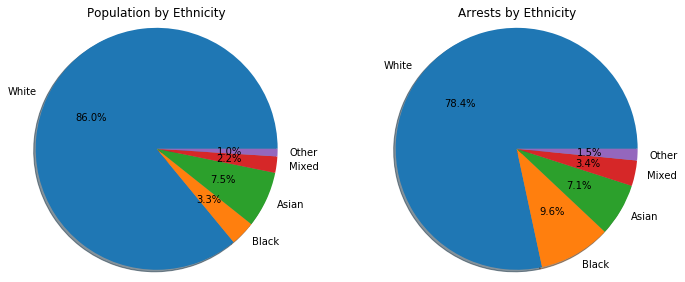

The comparison shows that population consists of 3.33 percent black ethnic groups; however, arrests data shows that 9.62 percent of arrested individuals originate from a black ethnicity


In [978]:
labels = 'White', 'Black', 'Asian', 'Mixed','Other'
population_ratio= [86,3.33,7.51,2.18,1.01]
arrests_ratio=[78.4,9.62,7.06,3.41,1.55]

fig = plt.figure(figsize=(10,7))

pop_ax = fig.add_axes([0, 0, .5, .5], aspect=1)
pop_ax.pie(population_ratio, labels=labels, radius = 1.2,autopct='%1.1f%%',shadow=True)
arrests_ax = fig.add_axes([.5, .0, .5, .5], aspect=1)
arrests_ax.pie(arrests_ratio, labels=labels, radius = 1.2,autopct='%1.1f%%',shadow=True)
pop_ax.set_title('Population by Ethnicity')
arrests_ax.set_title('Arrests by Ethnicity')
plt.show()
print('The comparison shows that population consists of %.2f percent black ethnic groups; however, arrests data shows that %.2f percent of arrested individuals originate from a black ethnicity' % (3.33,9.62))

**Observation:** it can be seen that the ratio between different ethnic groups in the population and arrested ethnic groups are quite close beside for the Black ethnic group. where the arrested ratio **9.62%** is almost three times the black ethnicity ratio in the UK population **3.3%**.

**In order to highlight the difference in crime envolvement by race and age; a MultiIndex data frame have been created in order to plot a relevant figure that links the age_group, ethnicity and total number of arrests.**

In [979]:
#Creating a MultiIndex dataframe in order to highlight that black males are more involved in crime "percentage wise" 
# As the percentage of black population is 3.33% of the total UK population.
#  and the percentage of white population is 86% of the total UK population.
plot_age_ethnic_arrest=pd.DataFrame((arrests_no_static_columns_no_nan.groupby(['Age_Group','Ethnicity'])['Number of arrests']).sum())
plot_age_ethnic_arrest

Number of arrests
Age_Group         Ethnicity                   
10 - 17 years     Asian                50512.0
                  Black               121439.0
                  Mixed                58524.0
                  Other                12341.0
                  White               672407.0
18 - 20 years     Asian                67963.0
                  Black               116454.0
                  Mixed                47733.0
                  Other                14570.0
                  White               722335.0
21 years and over Asian               534853.0
                  Black               652270.0
                  Mixed               209545.0
                  Other               116135.0
                  White              5860488.0

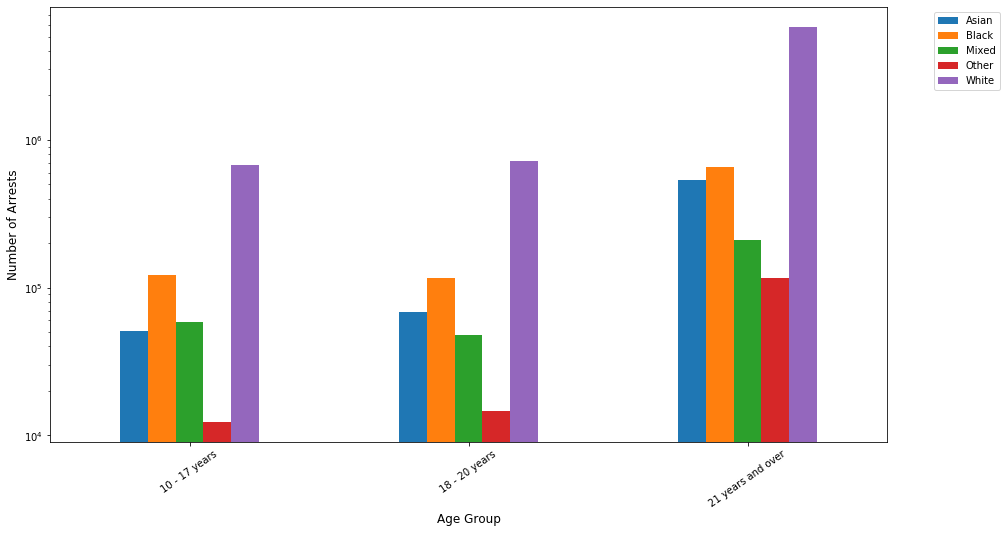

In [980]:
fig =plot_age_ethnic_arrest.unstack().plot(kind='bar', figsize=(15,8))
fig.set_yscale('log')
fig.set_xlabel('Age Group', fontsize='large')
plt.xticks(rotation=35)
fig.set_ylabel('Number of Arrests', fontsize='large')
fig.legend(labels=['Asian','Black','Mixed','Other','White'],bbox_to_anchor=(1.05, 1), loc='upper left')


**Observation:** It can be seen in the above bar plot that the black ethnicity arrests ratio is incompatible with the UK population ethnicity ratio in non of the available age groups in the dataset; this observation confirms the idea that the black ethnic group is three times larger (ratio wise) in preson than its ratio in the free population.

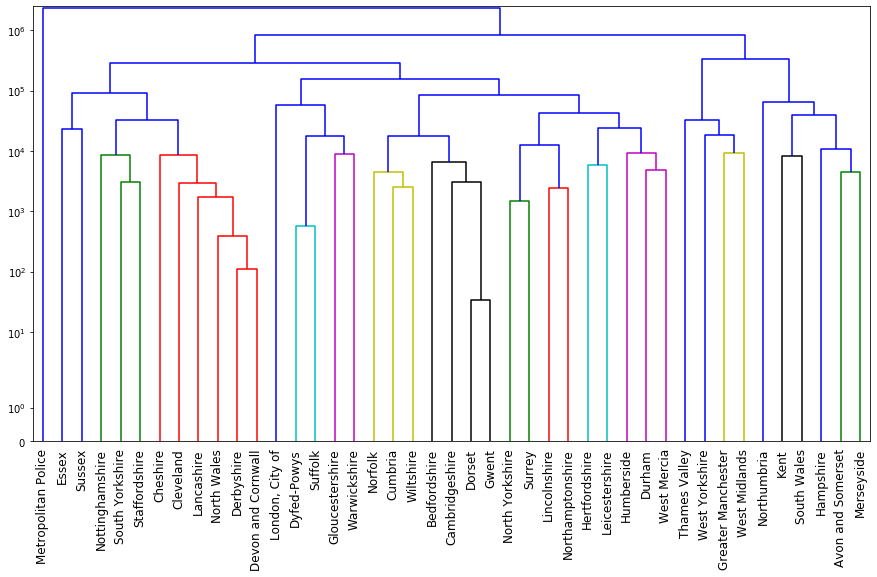

In [1123]:
# Below is a dendogram that shows a link between different geolocations based on the number of arrests carried in them
#  2 cities will be color-matched together if the difference between them is less that the threshold of (10,000)
import scipy.cluster.hierarchy as shc
dend = shc.dendrogram(shc.linkage(plot_ethnicity_geography, method='ward'), labels=plot_ethnicity_geography.index, color_threshold=10000 ) 
plt.rcParams["figure.figsize"] = (15,8)
plt.xticks(fontsize=12)
plt.yscale('symlog')

plt.show()

### Stop and Search by Ethnicity

In [1015]:
# showing an example of the first 3 rows in the arrests dataset
raw_StopSearch_ethnicity.head(3)

,Measure,Time,Time_type,Ethnicity,Ethnicity_type,Geography,Geography_type,Number of stop and searches,Total number of stop and search carried out in this year in this area (excluding cases where the ethnicity was unreported),Population by ethnicity,"Rate per 1,000 population by ethnicity",Proportion of total stop and searches of this ethnicity in the financial year (excludes unreported),Notes
0,Number of stops and searches carried out (excl...,2006/07,Financial year,All,All,Avon & Somerset,Police Force Area,"15,018","9,050","1,599,555",9.39,NaN,NaN
1,Number of stops and searches carried out (excl...,2006/07,Financial year,All,All,Bedfordshire,Police Force Area,"4,768","4,279","615,061",7.75,NaN,NaN
2,Number of stops and searches carried out (excl...,2006/07,Financial year,All,All,Cambridgeshire,Police Force Area,"8,773","8,582","804,841",10.90,NaN,NaN


In [1016]:
print('shape',raw_StopSearch_ethnicity.shape)

shape (13104, 13)


In [1017]:
raw_StopSearch_ethnicity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13104 entries, 0 to 13103
Data columns (total 13 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                        --------------  -----  
 0   Measure                                                                                                                       13104 non-null  object 
 1   Time                                                                                                                          13104 non-null  object 
 2   Time_type                                                                                                                     13104 non-null  object 
 3   Ethnicity                                                                                                      

**Note: It can be seen that some attributes carry some ambiguity in terms of their meaning and possible values; such as:**

**[**'Measure' , 'Time_type','Ethnicity Type','Geography_type'**]**

Therefore, their distinct values will be analysed to know their meaning and purpose in the dataset.

In [1018]:
# Showing comlumns with less than 3 distinct values
non_unique = raw_StopSearch_ethnicity.apply(pd.Series.nunique)
static_columns = non_unique[(non_unique>=1)&(non_unique<4)].index
static_columns

Index(['Measure', 'Time_type', 'Ethnicity_type', 'Geography_type'], dtype='object')

In [1019]:
 # Showing the distinct values in columns that contain less than 3 distinct values
for i in static_columns:
    print('column:',i,'\nNumber of unique values:',len(raw_StopSearch_ethnicity[i].unique()),'\nUnique values:',raw_StopSearch_ethnicity[i].unique(),'\n')

column: Measure 
Number of unique values: 1 
Unique values: ['Number of stops and searches carried out (excluding vehicle only searches)'] 

column: Time_type 
Number of unique values: 1 
Unique values: ['Financial year'] 

column: Ethnicity_type 
Number of unique values: 3 
Unique values: ['All' 'ONS 2001 16+1' 'ONS 2001 5+1'] 

column: Geography_type 
Number of unique values: 1 
Unique values: ['Police Force Area'] 



**To Remove:** as they only have one distinct value for all rows

1. **Measure:** Which represent the measuring methodology and the column will be deleted as it has the same value for all rows.

2. **Time_type:** Which represent how the time was demonstrated/formated while gathering the data.

3. **Ethnicity_type:** will be removed as it uses ONS mapping and we will use the 'Ethnicity'.

4. **Geography_type:** which represents the methodology of determining the location of the study.

In [1020]:
#creating a copy of the arrests raw dataset before removing the static columns.
stopSearch_no_static = raw_StopSearch_ethnicity.copy()
stopSearch_no_static= stopSearch_no_static.drop(static_columns, axis=1)
pd.DataFrame(stopSearch_no_static.isnull().sum(), columns=[ 'Missing values'])

,Missing values
Time,0
Ethnicity,0
Geography,0
Number of stop and searches,0
Total number of stop and search carried out in this year in this area (excluding cases where the ethnicity was unreported),0
Population by ethnicity,0
"Rate per 1,000 population by ethnicity",0
Proportion of total stop and searches of this ethnicity in the financial year (excludes unreported),546
Notes,13104


**Note:**Columns with index (4,5,6,7 & 8) are statistically generated attributes that we can calculate individually from columns (0-3); furthermore, the mentioned columns (7&8) mostly contained missing values or general notes that I believe wont provide any additional benifit to a model.

In [1021]:
# dropping all columns that contain missing values & can still be computed from other features.
#stopSearch_no_static = stopSearch_no_static[:-5]
stopSearch_no_static = stopSearch_no_static[stopSearch_no_static.columns[:-5]]
stopSearch_no_static

,Time,Ethnicity,Geography,Number of stop and searches
0,2006/07,All,Avon & Somerset,"15,018"
1,2006/07,All,Bedfordshire,"4,768"
2,2006/07,All,Cambridgeshire,"8,773"
3,2006/07,All,Cheshire,"6,472"
4,2006/07,All,Cleveland,"12,137"
...,...,...,...,...
13099,2017/18,White,Warwickshire,"1,415"
13100,2017/18,White,West Mercia,"3,552"
13101,2017/18,White,West Midlands,"5,439"
13102,2017/18,White,West Yorkshire,"4,492"


**Below:** Displaying all the distinct values of different attributes so the following preprocess can be done:

1. **Ethnicity:** values can be shortlisted to [Asian,Black,Bangladeshi, Indian, Pakistani, White, Mixed].
2. **Create an ALL dataframe:** some rows has the value "All" for Ethnicity & Geography to give an overall view of the dataset which will be extracted.



In [1022]:
# Showing the distinct values in columns that contain less than 3 distinct values
non_unique = stopSearch_no_static.apply(pd.Series.nunique)
static_columns = non_unique[(non_unique>=1)&(non_unique<200)].index
for i in static_columns:
    print('column:',i,'\nNumber of unique values:',len(stopSearch_no_static[i].unique()),'\nUnique values:',stopSearch_no_static[i].unique(),'\n')

column: Time 
Number of unique values: 12 
Unique values: ['2006/07' '2007/08' '2008/09' '2009/10' '2010/11' '2011/12' '2012/13'
 '2013/14' '2014/15' '2015/16' '2016/17' '2017/18'] 

column: Ethnicity 
Number of unique values: 23 
Unique values: ['All' 'Any other Asian background' 'Any other black background'
 'Any other ethnic group' 'Any other mixed/multiple ethnic background'
 'Any other white background' 'Bangladeshi' 'Black African'
 'Black Caribbean' 'Chinese' 'Indian' 'Mixed White and Asian'
 'Mixed White and Black African' 'Mixed White and Black Caribbean'
 'Pakistani' 'Unreported' 'White British' 'White Irish' 'Asian' 'Black'
 'Mixed' 'Other' 'White'] 

column: Geography 
Number of unique values: 46 
Unique values: ['Avon & Somerset' 'Bedfordshire' 'Cambridgeshire' 'Cheshire' 'Cleveland'
 'Cumbria' 'Derbyshire' 'Devon & Cornwall' 'Dorset' 'Durham' 'Dyfed-Powys'
 'Essex' 'Gloucestershire' 'Greater Manchester' 'Gwent' 'Hampshire'
 'Hertfordshire' 'Humberside' 'Kent' 'Lancashire'

In [1023]:
# Grouping multiple ethnicity to enhance data visualisation and the drawn conclusions
#  The grouping is based on how close are the grouped ethnicities are to each other.
final_ethnic_group = { 'Any other Asian background':'Asian', 'Any other black background':'Black',
 'Any other ethnic group':'Other', 'Any other mixed/multiple ethnic background':'Mixed',
 'Any other white background':'White', 'Bangladeshi':'Asian', 'Black African':'Black',
 'Black Caribbean':'Black', 'Chinese':'Asian', 'Indian':'Asian', 'Mixed White and Asian':'Mixed',
 'Mixed White and Black African':'Mixed', 'Mixed White and Black Caribbean':'Mixed',
 'Pakistani':'Asian', 'White British':'White', 'White Irish':'White', 'White':'White'}
stopSearch_no_static_no_nan=stopSearch_no_static.replace({"Ethnicity":final_ethnic_group})
stopSearch_no_static_no_nan

,Time,Ethnicity,Geography,Number of stop and searches
0,2006/07,All,Avon & Somerset,"15,018"
1,2006/07,All,Bedfordshire,"4,768"
2,2006/07,All,Cambridgeshire,"8,773"
3,2006/07,All,Cheshire,"6,472"
4,2006/07,All,Cleveland,"12,137"
...,...,...,...,...
13099,2017/18,White,Warwickshire,"1,415"
13100,2017/18,White,West Mercia,"3,552"
13101,2017/18,White,West Midlands,"5,439"
13102,2017/18,White,West Yorkshire,"4,492"


**Removing any row that contains an "Unreported" value for any of its attributes; as such rows has a missing value for its Ethnicity feature**.

In [1024]:
stopSearch_no_static_no_nan = stopSearch_no_static_no_nan.replace('Unreported', np.nan)
stopSearch_no_static_no_nan = stopSearch_no_static_no_nan.dropna()

**Removing any row that contains an "All" value for any of its attributes; as such rows are generated by summing other rows depending on the column that had the "All" value**.
This also includes 'All - including BTP' & 'All - excluding BTP' as there is a specific category that counts transport police stop and search.

In [1025]:
stopSearch_no_static_no_nan = stopSearch_no_static_no_nan.replace('All', np.nan)
stopSearch_no_static_no_nan = stopSearch_no_static_no_nan.dropna()

In [1026]:
stopSearch_no_static_no_nan = stopSearch_no_static_no_nan.replace('All - including BTP', np.nan)
stopSearch_no_static_no_nan = stopSearch_no_static_no_nan.dropna()

In [1027]:
stopSearch_no_static_no_nan = stopSearch_no_static_no_nan.replace('All - excluding BTP', np.nan)
stopSearch_no_static_no_nan = stopSearch_no_static_no_nan.dropna()

**Showing the remaining distinct values in all columns beside 'Number of stop and searches'**

In [1044]:
# Showing the distinct values in columns that contain less than 3 distinct values
non_unique = stopSearch_no_static_no_nan.apply(pd.Series.nunique)
static_columns = non_unique[(non_unique>=1)&(non_unique<200)].index
for i in static_columns:
    print('column:',i,'\nNumber of unique values:',len(stopSearch_no_static_no_nan[i].unique()),'\nUnique values:',stopSearch_no_static_no_nan[i].unique(),'\n')

column: Time 
Number of unique values: 12 
Unique values: ['2006/07' '2007/08' '2008/09' '2009/10' '2010/11' '2011/12' '2012/13'
 '2013/14' '2014/15' '2015/16' '2016/17' '2017/18'] 

column: Ethnicity 
Number of unique values: 5 
Unique values: ['Asian' 'Black' 'Other' 'Mixed' 'White'] 

column: Geography 
Number of unique values: 44 
Unique values: ['Avon & Somerset' 'Bedfordshire' 'Cambridgeshire' 'Cheshire' 'Cleveland'
 'Cumbria' 'Derbyshire' 'Devon & Cornwall' 'Dorset' 'Durham' 'Dyfed-Powys'
 'Essex' 'Gloucestershire' 'Greater Manchester' 'Gwent' 'Hampshire'
 'Hertfordshire' 'Humberside' 'Kent' 'Lancashire' 'Leicestershire'
 'Lincolnshire' 'London, City of' 'Merseyside' 'Metropolitan Police'
 'Norfolk' 'North Wales' 'North Yorkshire' 'Northamptonshire'
 'Northumbria' 'Nottinghamshire' 'South Wales' 'South Yorkshire'
 'Staffordshire' 'Suffolk' 'Surrey' 'Sussex' 'Thames Valley'
 'Warwickshire' 'West Mercia' 'West Midlands' 'West Yorkshire' 'Wiltshire'
 'British Transport Police'] 



In [1045]:
stopSearch_no_static_no_nan.columns

Index(['Time', 'Ethnicity', 'Geography', ' Number of stop and searches '], dtype='object')

In [1046]:
stopSearch_no_static_no_nan.loc[stopSearch_no_static_no_nan[' Number of stop and searches '] == '-'].shape

(0, 4)

In [1111]:
stopSearch_no_static_no_nan

,Time,Ethnicity,Geography,Number of stop and searches
0,2006/07,Asian,Avon & Somerset,46
1,2006/07,Asian,Bedfordshire,42
2,2006/07,Asian,Cambridgeshire,77
3,2006/07,Asian,Cheshire,16
4,2006/07,Asian,Cleveland,40
...,...,...,...,...
11020,2017/18,White,Warwickshire,1415
11021,2017/18,White,West Mercia,3552
11022,2017/18,White,West Midlands,5439
11023,2017/18,White,West Yorkshire,4492


In [1118]:
stopSearch_no_static_no_nan = stopSearch_no_static_no_nan.replace('-', np.nan)
stopSearch_no_static_no_nan = stopSearch_no_static_no_nan.dropna()
stopSearch_no_static_no_nan=stopSearch_no_static_no_nan.reset_index(drop=True)
stopSearch_no_static_no_nan[' Number of stop and searches '] = stopSearch_no_static_no_nan[' Number of stop and searches '].astype(str)


In [1121]:
stopSearch_no_static_no_nan[' Number of stop and searches '] = stopSearch_no_static_no_nan[' Number of stop and searches '].str.replace(' ', '')
stopSearch_no_static_no_nan[' Number of stop and searches '] = stopSearch_no_static_no_nan[' Number of stop and searches '].str.replace(',', '')
stopSearch_no_static_no_nan[' Number of stop and searches '] = stopSearch_no_static_no_nan[' Number of stop and searches '].str.replace(',', '').astype(float)
stopSearch_no_static_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11025 entries, 0 to 11024
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time                           11025 non-null  object 
 1   Ethnicity                      11025 non-null  object 
 2   Geography                      11025 non-null  object 
 3    Number of stop and searches   11025 non-null  float64
dtypes: float64(1), object(3)
memory usage: 344.7+ KB


In [1122]:

plot_ethnicity_stopSearch=pd.DataFrame((stopSearch_no_static_no_nan.groupby('Ethnicity')[' Number of stop and searches ']).sum().sort_values(ascending=False))
plot_ethnicity_stopSearch

,Number of stop and searches
Ethnicity,
White,14480240.0
Black,3164676.0
Asian,2129018.0
Mixed,628932.0
Other,277370.0


In [1127]:
fig1 = px.bar(plot_ethnicity_stopSearch, x=plot_ethnicity_stopSearch.index, 
              y=plot_ethnicity_stopSearch[' Number of stop and searches '], color=plot_ethnicity_stopSearch.index, 
              color_discrete_sequence=px.colors.qualitative.Pastel)

fig1.update_layout(title={
                  'text': "Number of Stop-Search by Ethnicity (2013/14 - 2018/19)",
                  'y':0.95,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  template='ggplot2')


In [1128]:
fig2 = px.pie(plot_ethnicity_stopSearch, plot_ethnicity_stopSearch.index, 
              plot_ethnicity_stopSearch[' Number of stop and searches '], 
              color_discrete_sequence=px.colors.qualitative.Pastel, hole=0.5)

fig2.update_layout(title={
                  'text': "UK Stop-Search by Ethnicity",
                  'y':0.955,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                   height=600,
                  template='plotly_white')

fig2.update_traces(textposition='inside', textinfo='percent+label', pull=[0, 0.2])

fig2.data[0].marker.line.width = 1
fig2.data[0].marker.line.color = "black"
fig2.show()

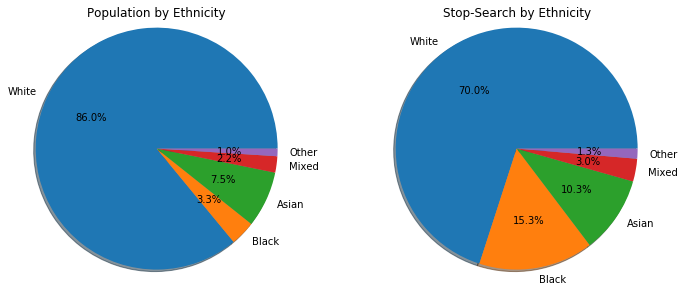

The comparison shows that 15.30 percent of the stoped and searched individuals fall into the black ethnic group; however, UK opopulation data shows that only 3.30 percent of the UK population originate from a black ethnicity which is 5 times less than black ethnicity stop and search ratio


In [1129]:
labels = 'White', 'Black', 'Asian', 'Mixed','Other'
population_ratio= [86,3.33,7.51,2.18,1.01]
arrests_ratio=[70,15.3,10.3,3.04,1.34]
fig = plt.figure(figsize=(10,7))
pop_ax = fig.add_axes([0, 0, .5, .5], aspect=1)
pop_ax.pie(population_ratio, labels=labels, radius = 1.2,autopct='%1.1f%%',shadow=True)
arrests_ax = fig.add_axes([.5, .0, .5, .5], aspect=1)
arrests_ax.pie(arrests_ratio, labels=labels, radius = 1.2,autopct='%1.1f%%',shadow=True)
pop_ax.set_title('Population by Ethnicity')
arrests_ax.set_title('Stop-Search by Ethnicity')
plt.show()
print('The comparison shows that %.2f percent of the stoped and searched individuals fall into the black ethnic group; however, UK opopulation data shows that only %.2f percent of the UK population originate from a black ethnicity which is 5 times less than black ethnicity stop and search ratio' % (15.3,3.3))

**Observation:** it can be seen that the ratio between different ethnic groups in the population and arrested ethnic groups are quite close beside for the Black ethnic group. where the arrested ratio **9.62%** is almost three times the black ethnicity ratio in the UK population **3.3%**.